In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [46]:
#dataset = 'model/keypoint_classifier/keypoint_right.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier_right.hdf5'
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_right.tflite'

#dataset = 'model/keypoint_classifier/keypoint_left.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier_left.hdf5'
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_left.tflite'

dataset = r'model\UnityData\letters.csv'
model_save_path = r'model\UnityData\letters.hdf5'
tflite_save_path = r'model\UnityData\letters.tflite'

# Set number of classes

In [47]:
NUM_CLASSES = 18

# Dataset reading

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 18)                198       
                                                                 
Total params: 1,268
Trainable params: 1,268
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/21 [>.............................] - ETA: 10s - loss: 2.4296 - accuracy: 0.0859
Epoch 1: saving model to model\UnityData\letters.hdf5
21/21 [==============================] - 1s 11ms/step - loss: 2.4054 - accuracy: 0.1044 - val_loss: 2.2787 - val_accuracy: 0.1063
Epoch 2/1000
 1/21 [>.............................] - ETA: 0s - loss: 2.3555 - accuracy: 0.0781
Epoch 2: saving model to model\UnityData\letters.hdf5
21/21 [==============================] - 0s 6ms/step - loss: 2.3069 - accuracy: 0.1261 - val_loss: 2.2217 - val_accuracy: 0.1734
Epoch 3/1000
 1/21 [>.............................] - ETA: 0s - loss: 2.2445 - accuracy: 0.1641
Epoch 3: saving model to model\UnityData\letters.hdf5
21/21 [==============================] - 0s 7ms/step - loss: 2.2355 - accuracy: 0.1540 - val_loss: 2.1603 - val_accuracy: 0.2651
Epoch 4/1000
 1/21 [>.............................] - ETA: 0s - loss: 2.1652 - accuracy: 0.1875
Epoch 4: saving model to model\UnityData\letters.hdf5
21/21 [====

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9911


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 58ms/step
[1.8764964e-12 3.1921219e-14 3.7614782e-09 1.2358545e-22 1.4677805e-12
 1.8385324e-15 4.4630624e-02 9.5536935e-01 1.7297584e-12 3.1449583e-11]
7


# Confusion matrix

28/28 [==============================] - 0s 1ms/step


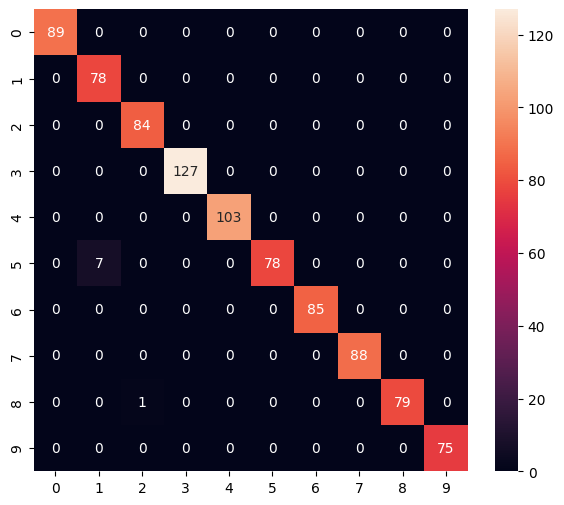

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.92      1.00      0.96        78
           2       0.99      1.00      0.99        84
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       103
           5       1.00      0.92      0.96        85
           6       1.00      1.00      1.00        85
           7       1.00      1.00      1.00        88
           8       1.00      0.99      0.99        80
           9       1.00      1.00      1.00        75

    accuracy                           0.99       894
   macro avg       0.99      0.99      0.99       894
weighted avg       0.99      0.99      0.99       894



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\anees\AppData\Local\Temp\tmpadko5f5q\assets


INFO:tensorflow:Assets written to: C:\Users\anees\AppData\Local\Temp\tmpadko5f5q\assets


6836

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8765035e-12 3.1921399e-14 3.7614853e-09 1.2358592e-22 1.4677831e-12
 1.8385392e-15 4.4630628e-02 9.5536935e-01 1.7297616e-12 3.1449579e-11]
7
